# **Phishing Website Detection by Machine Learning Techniques**


## **1. Objective:**
A phishing website is a common social engineering method that mimics trustful uniform resource locators (URLs) and webpages. The objective of this project is to train machine learning models and deep neural nets on the dataset to predict phishing websites. Both phishing and benign URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted. The performance level of each model is measures and compared.


## **2. Loading Data:**

The dataset that is given is loaded.

In [100]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
#Loading the data
data0 = pd.read_csv('dataset_website.csv')
data0.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


## **3. Familiarizing with Data**
In this step, few dataframe methods are used to look into the data and its features.

In [102]:
#Checking the shape of the dataset
data0.shape

(11055, 32)

In [103]:
#Listing the features of the dataset
data0.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [104]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

## **4. Visualizing the data**
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

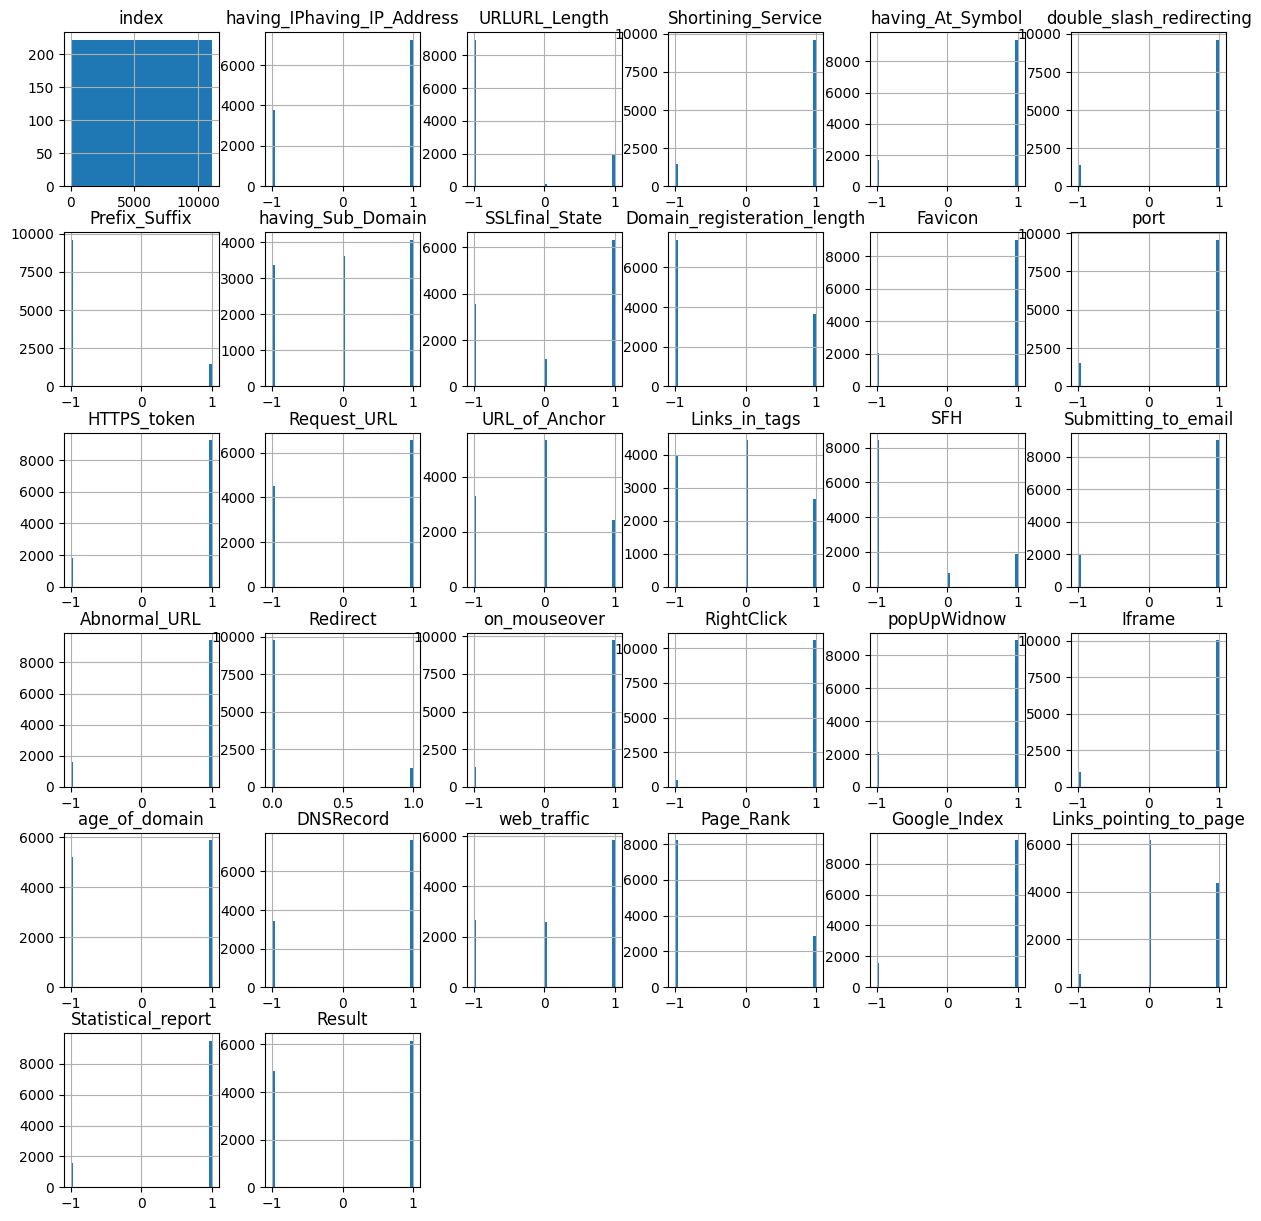

In [105]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

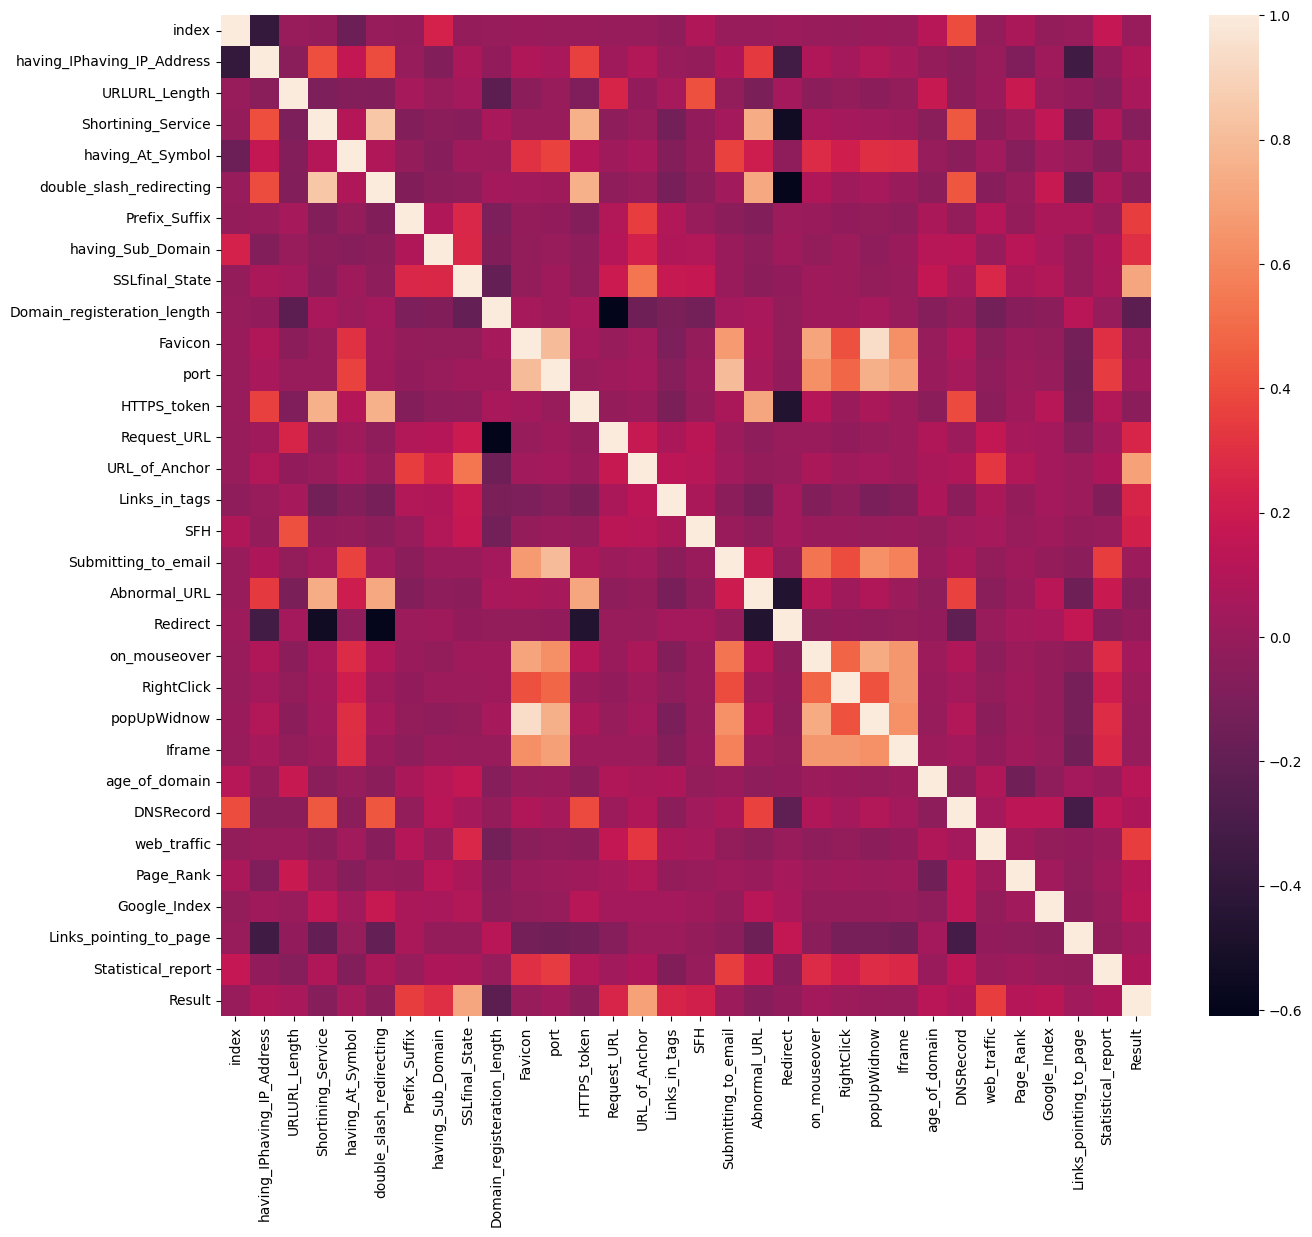

In [106]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

## **5. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [107]:
data0.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From data distribution graph and correlation matrix, we can conclude that the following features do not have much impact on the result:


*   having_Sub_Domain
*   Domain_registeration_length
*   Favicon
*   Request_URL
*   URL_of_Anchor
*   Links_in_tags
*   Submitting_to_email
*   Redirect
*   on_mouseover
*   RightClick
*   age_of_domain
*   web_traffic
*   Page_Rank
*   Google_Index
*   Links_pointing_to_page


In [108]:
#Removing the features which do not have much impact on Result
data=data0.iloc[:,[1,2,3,4,5,6,12,20,21,22,23,24,25,30,31]]
data.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,HTTPS_token,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1
1,1,1,1,1,1,-1,-1,1,1,1,1,-1,-1,1,-1
2,1,0,1,1,1,-1,-1,1,1,1,1,1,-1,-1,-1
3,1,0,1,1,1,-1,-1,1,1,1,1,-1,-1,1,-1
4,1,0,-1,1,1,-1,1,-1,1,-1,1,-1,-1,1,1


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   having_IPhaving_IP_Address  11055 non-null  int64
 1   URLURL_Length               11055 non-null  int64
 2   Shortining_Service          11055 non-null  int64
 3   having_At_Symbol            11055 non-null  int64
 4   double_slash_redirecting    11055 non-null  int64
 5   Prefix_Suffix               11055 non-null  int64
 6   HTTPS_token                 11055 non-null  int64
 7   on_mouseover                11055 non-null  int64
 8   RightClick                  11055 non-null  int64
 9   popUpWidnow                 11055 non-null  int64
 10  Iframe                      11055 non-null  int64
 11  age_of_domain               11055 non-null  int64
 12  DNSRecord                   11055 non-null  int64
 13  Statistical_report          11055 non-null  int64
 14  Result

This leaves us with 13 features & a target column.

In [110]:
#checking the data for null or missing values
data.isnull().sum()

having_IPhaving_IP_Address    0
URLURL_Length                 0
Shortining_Service            0
having_At_Symbol              0
double_slash_redirecting      0
Prefix_Suffix                 0
HTTPS_token                   0
on_mouseover                  0
RightClick                    0
popUpWidnow                   0
Iframe                        0
age_of_domain                 0
DNSRecord                     0
Statistical_report            0
Result                        0
dtype: int64

From the above execution, it is clear that the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training.

## **6. Splitting the Data**

In [111]:
# Sepratating & assigning features and target columns to X & y
X=data.iloc[:,:13]
y=data.iloc[:,13]
X.shape, y.shape

((11055, 13), (11055,))

In [112]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8844, 13), (2211, 13))

## **7. Machine Learning Models & Training**

From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression. 

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:
* XGBoost
* Decision Tree
* Random Forest
* Support Vector Machines

In [113]:
#importing packages
from sklearn.metrics import accuracy_score

In [114]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### **7.1. XGBoost Classifier**

XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [115]:
#XGBoost Classification model
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7,verbosity = 0)
#fit the model
xgb.fit(X = X_train,y = y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.4, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [116]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Performance Evaluation:**

In [117]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.913
XGBoost : Accuracy on test Data: 0.847


**Storing the results:**

In [118]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

### **7.2. Decision Tree Classifier**
 Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.
 
In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [119]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [120]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [121]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.898
Decision Tree: Accuracy on test Data: 0.848


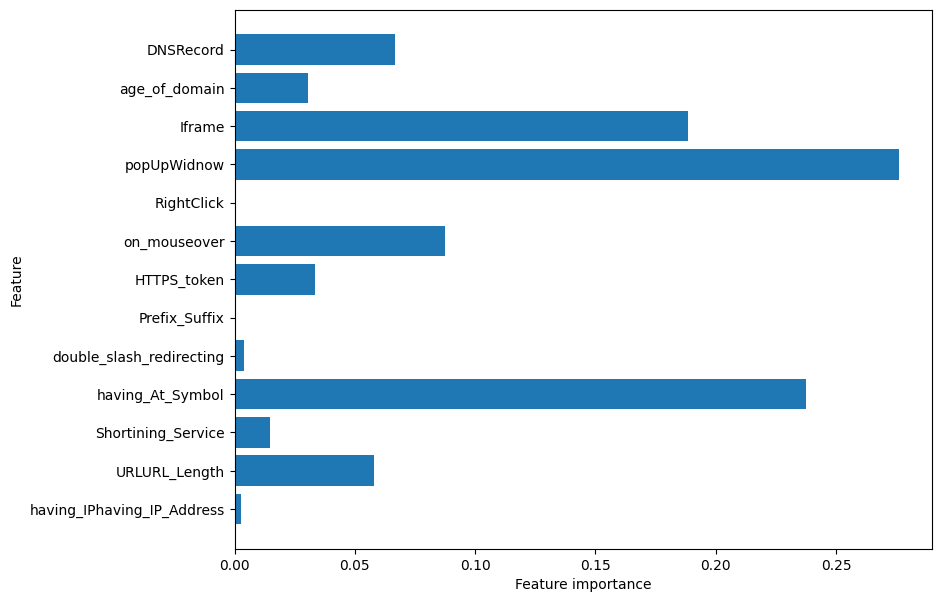

In [122]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
X_train = pd.DataFrame(X_train, columns = X.columns)
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [123]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### **7.3. Random Forest Classifier**
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [124]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [125]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [126]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.895
Random forest: Accuracy on test Data: 0.856


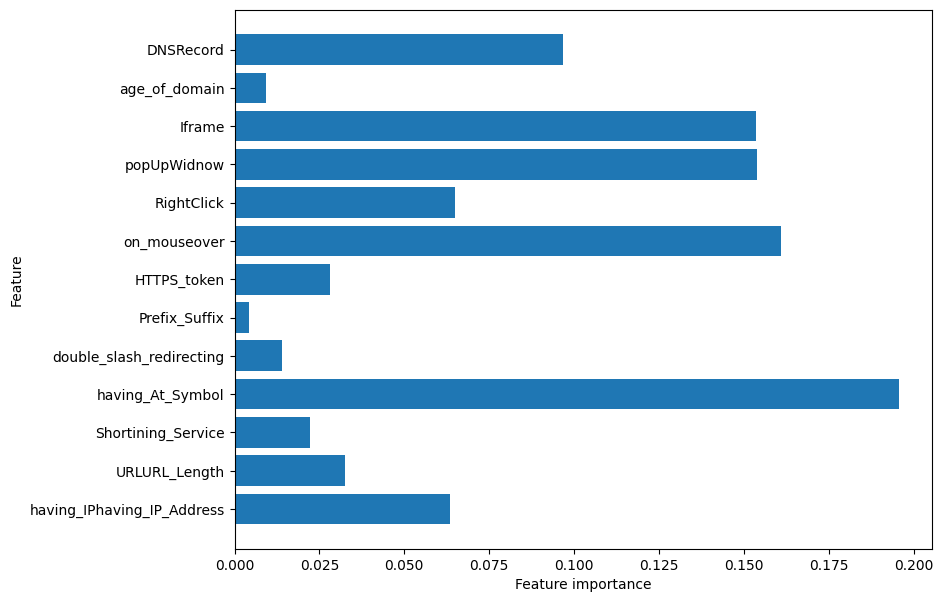

In [127]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [128]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### **7.4. Support Vector Machines**

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [129]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [130]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

**Performance Evaluation:**

In [131]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.886
SVM : Accuracy on test Data: 0.849


**Storing the results:**

In [132]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

## **8. Comparision of Models**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [133]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,XGBoost,0.913,0.847
1,Decision Tree,0.898,0.848
2,Random Forest,0.895,0.856
3,SVM,0.886,0.849


In [134]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,Random Forest,0.895,0.856
3,SVM,0.886,0.849
1,Decision Tree,0.898,0.848
0,XGBoost,0.913,0.847


For the above comparision, it is clear that the XGBoost Classifier works well with this dataset.

So, saving the model for future use.

In [135]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pkl", "wb"))

**Testing the saved model:**

In [136]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pkl", "rb"))
loaded_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.4, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

## **9. References**
* https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/

## **10. Deployment**

In [137]:
pwd

'c:\\Users\\WELCOME\\IBM project'

In [138]:
!pip install -U ibm-watson-machine-learning

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\WELCOME\\IBM project\\.venv\\Lib\\site-packages\\~andas\\_libs\\algos.cp310-win_amd64.pyd'
Check the permissions.




     ---------------------------------------- 1.8/1.8 MB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 10.0/10.0 MB 3.9 MB/s eta 0:00:00
     -------------------------------------- 55.6/55.6 kB 966.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 956.8/956.8 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 135.7/135.7 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.1
    Uninstalling pandas-1.5.1:
      Successfully uninstalled pandas-1.5.1


In [139]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

ModuleNotFoundError: No module named 'ibm_watson_machine_learning'

### Authenticate and set space

In [ ]:
wml_credentials = {
    "apikey": "",
    "url": "https://us-south.ml.cloud.ibm.com"
}
#hid apikey because of security reasons
#use your own apikey

In [ ]:
wml_client=APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----------------------  ------------------------
ID                                    NAME                    CREATED
4845b8ab-cb14-4346-b586-0b27febfb500  web-phishing-detection  2022-11-11T06:53:21.297Z
------------------------------------  ----------------------  ------------------------


In [ ]:
SPACE_ID = "4845b8ab-cb14-4346-b586-0b27febfb500"

In [ ]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [ ]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

### Save and deploy the model

In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

In [ ]:
MODEL_NAME = 'WebPhishingDetection'
DEPLOYMENT_LAYER = 'WebPhishingDetectionDeployment'
DEMO_MODEL = xgb

In [ ]:
#set python version
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [ ]:
#setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

In [ ]:
#save model
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL,
    meta_props=model_props,
    training_data=X_train,
    training_target=y_train
)

In [ ]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l1',
  'schemas': {'input': [{'fields': [{'name': 'f0', 'type': 'int'},
      {'name': 'f1', 'type': 'int'},
      {'name': 'f2', 'type': 'int'},
      {'name': 'f3', 'type': 'int'},
      {'name': 'f4', 'type': 'int'},
      {'name': 'f5', 'type': 'int'},
      {'name': 'f6', 'type': 'int'},
      {'name': 'f7', 'type': 'int'},
      {'name': 'f8', 'type': 'int'},
      {'name': 'f9', 'type': 'int'},
      {'name': 'f10', 'type': 'int'},
      {'name': 'f11', 'type': 'int'},
      {'name': 'f12', 'type': 'int'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-11T07:09:42.002Z',
  'id': '3645aafc-b5f9-412d-8e48-819c8d9bfdc4',
  'modified_at': '2022-11-11T07:09:44.807Z',
  'name': 'WebPhishingDetection',
  'owner': 'IBMid-667000EZJI',
  'reso

In [ ]:
model_id = wml_client.repository.get_model_id(model_details)

In [ ]:
model_id

'3645aafc-b5f9-412d-8e48-819c8d9bfdc4'

In [ ]:
#set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_LAYER,
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [ ]:
#deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_id,
    meta_props=deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: '3645aafc-b5f9-412d-8e48-819c8d9bfdc4' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='859ae568-d692-4958-9dbe-60431a8a0918'
------------------------------------------------------------------------------------------------


